In [ ]:
!pip install selenium
!apt-get update 
!apt install chromium-chromedriver

     |████████████████████████████████| 968 kB 5.1 MB/s 
     |████████████████████████████████| 138 kB 55.1 MB/s 
     |████████████████████████████████| 359 kB 52.7 MB/s 
     |████████████████████████████████| 3.6 MB 38.8 MB/s 
     |████████████████████████████████| 55 kB 3.9 MB/s 
     |████████████████████████████████| 58 kB 4.9 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
requests 2.23.0 requires urllib3!=1.25.0,!=1.25.1,<1.26,>=1.21.1, but you have urllib3 1.26.9 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:2 https://cloud.r-project.org/bin/

In [ ]:
#Task1
#Crawling 100 comments
import time
from selenium.webdriver import Chrome
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import TimeoutException
from selenium.common.exceptions import StaleElementReferenceException
import re
from collections import Counter
from keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score
from tensorflow.keras.preprocessing.sequence import pad_sequences
import nltk
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Flatten
from tensorflow.keras import layers , activations , models , preprocessing , utils
from sklearn.tree import DecisionTreeClassifier
import string
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/requests/__init__.py:91: RequestsDependencyWarning: urllib3 (1.26.9) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


In [ ]:
dataset_1=[]
#Bài 1 
from selenium import webdriver
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')
#driver = webdriver.Chrome('chromedriver',chrome_options=chrome_options)
with webdriver.Chrome('chromedriver',chrome_options=chrome_options) as driver:
    wait = WebDriverWait(driver,15)
    driver.get("https://www.youtube.com/watch?v=2AfaQ6qsLbw")

    for item in range(200):
        try:
            wait.until(EC.visibility_of_element_located((By.TAG_NAME, "body"))).send_keys(Keys.END)
        except(TimeoutException, StaleElementReferenceException):
            pass
    for comment in wait.until(EC.presence_of_all_elements_located((By.CSS_SELECTOR, "#content-text"))):
        dataset_1.append(comment.text)
dataset_1 = dataset_1[:100]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: use options instead of chrome_options
  if __name__ == '__main__':


In [ ]:
#Bài 2
dataset_2 = []
with Chrome(executable_path=r'chromedriver.exe') as driver:
    wait = WebDriverWait(driver,15)
    driver.get("https://www.youtube.com/watch?v=BdPk9ipvczM")

    for item in range(200):
        try:
            wait.until(EC.visibility_of_element_located((By.TAG_NAME, "body"))).send_keys(Keys.END)
        except(TimeoutException, StaleElementReferenceException):
            pass
    for comment in wait.until(EC.presence_of_all_elements_located((By.CSS_SELECTOR, "#content-text"))):
        dataset_2.append(comment.text)
dataset_2 = dataset_2[:100]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  This is separate from the ipykernel package so we can avoid doing imports until


WebDriverException: ignored

In [ ]:
#Bài 3
dataset_3 = []
with Chrome(executable_path=r'chromedriver.exe') as driver:
    wait = WebDriverWait(driver,15)
    driver.get("https://www.youtube.com/watch?v=Orv_t0KgEB8")

    for item in range(200):
        try:
            wait.until(EC.visibility_of_element_located((By.TAG_NAME, "body"))).send_keys(Keys.END)
        except(TimeoutException, StaleElementReferenceException):
            pass
    for comment in wait.until(EC.presence_of_all_elements_located((By.CSS_SELECTOR,"#content-text"))):
        dataset_3.append(comment.text)
dataset_3 = dataset_3[:100]

In [ ]:
import csv
with open('/content/data_comment_1_test.csv',mode = 'w',encoding = 'utf-8') as file:
    writer = csv.writer(file)
    for i in dataset_1:
        writer.writerow([i])

In [ ]:
with open('/content/data_comment_2_test.csv',mode = 'w',encoding = 'utf-8') as file:
    writer = csv.writer(file)
    for i in dataset_2:
        writer.writerow([i])

NameError: ignored

In [ ]:
with open('/content/data_comment_3_test.csv',mode = 'w',encoding = 'utf-8') as file:
    writer = csv.writer(file)
    for i in dataset_3:
        writer.writerow([i])

In [ ]:
import pandas as pd
df1 = pd.read_csv('/content/data_comment_1.csv',names = ["Comment","Label"])
df1 = pd.DataFrame(df1)
df1["Label"] = df1["Label"].replace({'Disgust':0,'Enjoyment':1,'Anger':2,'Surprise':3,'Sadness':4,'Fear':5,'Other':6})
df1.head()

,Comment,Label
0,Âm thanh hay quá ❤️ Cảm ơn chương trình Xuân H...,1
1,"Cách đây 27 năm trước, mẹ mình yêu chú, thời ấ...",4
2,Mình và chồng sắp cưới 4 năm trước có ước địn...,1
3,Mình nghe bài này thì nhận được tin nhắn của n...,4
4,Lyric: Dưới cơn mưa phùn nhẹ. Có hai kẻ khờ ch...,6


In [ ]:
df2 = pd.read_csv('/content/data_comment_2.csv',names = ["Comment","Label"])
df2['Label'] = df2['Label'].replace({'Disgust':0,'Enjoyment':1,'Anger':2,'Surprise':3,'Sadness':4,'Fear':5,'Other':6})
df2.head()

,Comment,Label
0,Âm nhạc là một món quà. Hôm nay mình nghĩ rất ...,1
1,MV Sài Gòn Đau Lòng Quá của Hứa Kim Tuyền ft H...,1
2,tik tok lại đưa e tới,6
3,Có ai khóc khi nghe lại đoạn điệp khúc lần 2 k...,4
4,Mong ai đã và đang trải qua cảm giác này sớm t...,4


In [ ]:
df3 = pd.read_csv('/content/data_comment_3.csv',names = ["Comment","Label"])
df3['Label'] = df3['Label'].replace({'Disgust':0,'Enjoyment':1,'Anger':2,'Surprise':3,'Sadness':4,'Fear':5,'Other':6})
df3.head()

,Comment,Label
0,Có ai nghe đến đoạn nhạc cuối trong MV hông 😘 ...,1
1,"Dễ nghe ấy chứ, nghe nhiều chắc chắn sẽ nghiện...",1
2,"Chúc mừng Phí Phương Anh, ca khúc quá tuyệt vờ...",1
3,mình thấy đoạn bridge của Rin9 đoạn em là nỗi ...,3
4,Giá như có thể gặp anh ở một thời điểm khác......,4


In [ ]:
#Hàm làm sạch text chứa các kí tự teencode thì xóa đi
def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    return text

In [ ]:
#Task2
#Read data
#Clean data train
df_train = pd.read_excel('/content/train_nor_811.xlsx', engine='openpyxl')
df_train = pd.DataFrame(df_train)
df_train = df_train[['Sentence','Emotion']] 
df_train= df_train.rename(columns = {'Sentence': 'Comment', 'Emotion': 'Label'}, inplace = False)
df_train['Label'] = df_train['Label'].map({'Disgust':0,'Enjoyment':1,'Anger':2,'Surprise':3,'Sadness':4,'Fear':5,'Other':6})
df_train['Comment'] = df_train['Comment'].apply(clean_text)
df_train

FileNotFoundError: ignored

Counter({1: 1558, 0: 1071, 6: 1021, 4: 947, 2: 391, 5: 318, 3: 242})
5548


<BarContainer object of 7 artists>

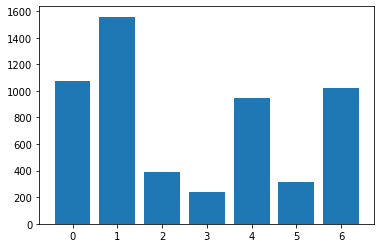

In [ ]:
counter = Counter()
y_train = df_train['Label'].values
X_train = df_train.iloc[:,0].values
counter.update(y_train)
print(counter)
print(len(X_train))

keys_train = counter.keys()
values_train = counter.values()
plt.bar(keys_train, values_train)

In [ ]:
#Read data valid
df_valid = pd.read_excel('/content/valid_nor_811.xlsx',engine='openpyxl')
df_valid = pd.DataFrame(df_valid)
df_valid = df_valid[['Sentence','Emotion']] 
df_valid= df_valid.rename(columns = {'Sentence': 'Comment', 'Emotion': 'Label'}, inplace = False)
df_valid['Label'] = df_valid['Label'].map({'Disgust':0,'Enjoyment':1,'Anger':2,'Surprise':3,'Sadness':4,'Fear':5,'Other':6})
df_valid['Comment'] = df_valid['Comment'].apply(clean_text)
df_valid

,Comment,Label
0,tính tao tao biết chẳng có chuyện gì có thể l...,6
1,lại là lào cai tự hào quê mình quá,1
2,bị từ chối rồi,4
3,tam đảo trời đẹp các mem à,1
4,đọc bình luận của thằng đó không thiếu chữ nào 😂😂,6
...,...,...
681,nhọc lòng,4
682,tao đã rất muốn làm bạn tốt anh em tri kỉ với ...,4
683,cơm tấm ở ngoài cũng như này 😡,0
684,chất liệu đỉnh quá,3


In [ ]:
counter_valid = Counter()
y_valid = df_valid['Label'].values
X_valid = df_valid.iloc[:,0].values
counter_valid.update(y_valid)
print(counter_valid)

Counter({1: 214, 6: 141, 0: 135, 4: 86, 2: 49, 5: 31, 3: 30})


In [ ]:
#Gộp train và valid thành data train model
data_train = []
for i in df_train['Comment']:
    data_train.append(i)
for i in df_valid['Comment']:
    data_train.append(i)
y_train = []
for i in df_train['Label']:
    y_train.append(i)
for i in df_valid['Label']:
    y_train.append(i)
    
tokenizer = tf.keras.preprocessing.text.Tokenizer(lower=True,split=' ')
tokenizer.fit_on_texts(data_train)
X_train = tokenizer.texts_to_sequences(data_train)
X_train = pad_sequences(X_train)
X_train
#chuyển chữ thành vector thư viện hổ trợ là tokenizer chuyển chữ thành vector
#fit on text tương ứng như đồ thị a ứng với số 0 ...
#text sequences sẽ đưa về cùng 1 chiều dài

array([[   0,    0,    0, ...,   18,   50,  250],
       [   0,    0,    0, ...,    5,  255, 1165],
       [   0,    0,    0, ...,   84,  205,   84],
       ...,
       [   0,    0,    0, ...,   19,    7, 1165],
       [   0,    0,    0, ..., 1018,  813,   22],
       [   0,    0,    0, ...,   32,   20,   23]], dtype=int32)

In [ ]:
#Read data test
df_test = pd.read_excel('/content/test_nor_811.xlsx',engine='openpyxl')
df_test = pd.DataFrame(df_test)
df_test = df_test[['Sentence','Emotion']] 
df_test= df_test.rename(columns = {'Sentence': 'Comment', 'Emotion': 'Label'}, inplace = False)
df_test['Label'] = df_test['Label'].map({'Disgust':0,'Enjoyment':1,'Anger':2,'Surprise':3,'Sadness':4,'Fear':5,'Other':6})
df_test['Comment'] = df_test['Comment'].apply(clean_text)
df_test

,Comment,Label
0,người ta có bạn bè nhìn vui thật,4
1,cho nghỉ viêc mói đúng sao goi là kỷ luật,3
2,kinh vãi 😡,0
3,nhà thì không xa lắm nhưng chưa bao giờ đi vì ...,5
4,bố không thích nộp đấy mày thích ý kiến không,2
...,...,...
688,lúc thì cuốc đất è cổ ra không có giun mà câu ...,4
689,các bác dẫn crush qua cây sữa nay mà hứng nước...,1
690,vợ chồng rồi mà trong sáng như này chỉ có tron...,3
691,bep này vào binh dương dùng xuất,6


In [ ]:
data_test = []
for i in df_test['Comment']:
    data_test.append(i)
y_test = []
for i in df_test['Label']:
    y_test.append(i)

    
tokenizer = tf.keras.preprocessing.text.Tokenizer(lower=True,split=' ')
tokenizer.fit_on_texts(data_test)
X_test = tokenizer.texts_to_sequences(data_test)
X_test = pad_sequences(X_test,154)

In [ ]:
#NB
model_NB = MultinomialNB()
model_NB = model_NB.fit(X_train,y_train)
y_pred = model_NB.predict(X_test)
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.18      0.02      0.04       132
           1       0.38      0.15      0.21       193
           2       0.11      0.20      0.14        40
           3       0.08      0.86      0.15        37
           4       0.13      0.04      0.06       116
           5       0.00      0.00      0.00        46
           6       0.26      0.19      0.22       129

    accuracy                           0.15       693
   macro avg       0.16      0.21      0.12       693
weighted avg       0.22      0.15      0.14       693

0.14574314574314573


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=100)
neigh.fit(X_train,y_train)
y_pred = neigh.predict(X_test)
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.15      0.05      0.07       132
           1       0.27      0.66      0.39       193
           2       0.00      0.00      0.00        40
           3       0.00      0.00      0.00        37
           4       0.22      0.07      0.11       116
           5       0.00      0.00      0.00        46
           6       0.17      0.20      0.18       129

    accuracy                           0.24       693
   macro avg       0.12      0.14      0.11       693
weighted avg       0.17      0.24      0.17       693

0.240981240981241


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
dtree = DecisionTreeClassifier()
dtree = dtree.fit(X_train,y_train)
y_pred = dtree.predict(X_test)
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.14      0.14      0.14       132
           1       0.31      0.26      0.28       193
           2       0.12      0.15      0.13        40
           3       0.15      0.14      0.14        37
           4       0.21      0.24      0.23       116
           5       0.08      0.07      0.07        46
           6       0.20      0.21      0.20       129

    accuracy                           0.20       693
   macro avg       0.17      0.17      0.17       693
weighted avg       0.20      0.20      0.20       693

0.20057720057720058


In [ ]:
data_test_crawl = [i for i in df1['Comment']]
for i in df2['Comment']:
    data_test_crawl.append(i)
for i in df3['Comment']:
    data_test_crawl.append(i)
y_test_crawl = [i for i in df1['Label']]
for i in df2['Label']:
    y_test_crawl.append(i)
for i in df3['Label']:
    y_test_crawl.append(i)
    
tokenizer = tf.keras.preprocessing.text.Tokenizer(lower=True,split=' ')
tokenizer.fit_on_texts(data_test_crawl)
X_test_crawl = tokenizer.texts_to_sequences(data_test_crawl)
X_test_crawl = pad_sequences(X_test_crawl,154)

#NB
y_pred_NB = model_NB.predict(X_test_crawl)
print(classification_report(y_test_crawl,y_pred_NB))
print(accuracy_score(y_test_crawl,y_pred_NB))

#KNN
y_pred_KNN = neigh.predict(X_test_crawl)
print(classification_report(y_test_crawl, y_pred_KNN))
print(accuracy_score(y_test_crawl,y_pred_KNN))

#decisionTree
y_pred_dtree = dtree.predict(X_test_crawl)
print(classification_report(y_test_crawl, y_pred_dtree))
print(accuracy_score(y_test_crawl,y_pred_dtree))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        14
           1       0.47      0.12      0.19       127
           2       0.05      0.50      0.08         8
           3       0.06      0.19      0.09        26
           4       0.36      0.11      0.16        94
           5       0.00      0.00      0.00         7
           6       0.11      0.14      0.12        22

    accuracy                           0.12       298
   macro avg       0.15      0.15      0.09       298
weighted avg       0.33      0.12      0.15       298

0.12416107382550336
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        14
           1       0.45      0.63      0.52       127
           2       0.00      0.00      0.00         8
           3       0.00      0.00      0.00        26
           4       0.58      0.16      0.25        94
           5       0.00      0.00      0.00         7
    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
